In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

function for df generation 

In [41]:
def df_generator(df_exp_data, df_num_data, binding_site):

    num_muts = []
    num_mut_sites = [] 
    binding_site_idx = [] 
    for mut in df_num_data["mutations"].to_numpy():
        num_muts.append(mut.split("_")[0])
        num_mut_sites.append(int(mut.split("_")[0][1:-1])) #just get numerical value
    sorting_idx = np.argsort(num_mut_sites)
    num_muts = np.array(num_muts)[sorting_idx] #just sort by binding site 
    for mut in binding_site : 
        binding_site_idx.append(np.where(num_muts == mut )[0] [0]) 

    exp_muts_np = df_exp_data["mutation"].to_numpy()
    idx= []  
    for mut in num_muts : 
        idx.append(np.where(exp_muts_np == mut )[0] [0]) 
    if np.all(exp_muts_np[idx] == num_muts) == False :      #check here
        print("Error, mutations do not match")
        
    relevant_exp_data = df_exp_data.iloc[idx]["bind_avg"].to_numpy()
    R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
    T =298  #room temp  
    K_D_app = 3.9*1e-11 #from paper 
    delta_g_deg = R * T * np.log(K_D_app)
    tmp_K_mut = 10**(relevant_exp_data) * K_D_app
    delta_g_first_method = -R * T * np.log(tmp_K_mut)

    del_del_g_total = - ( delta_g_deg + delta_g_first_method) 

    df_num_data_sorted= df_num_data.iloc[sorting_idx].copy()
    df_num_data_sorted["exp_data"] = del_del_g_total
    df_num_data_sorted["mutations"] = num_muts
    df_num_data_sorted_binding_site = df_num_data_sorted.iloc[binding_site_idx].copy()
    return df_num_data_sorted, df_num_data_sorted_binding_site, binding_site_idx

binding site dec

In [42]:
binding_site =np.array( ['K417A', 'N439A', 'Y449A', 'Y453A', 'L455A', 'F456A',
       'F486A', 'N487A', 'Y489A', 'Q493A', 'S494A', 'Q498A',
       'T500A', 'N501A', 'V503A', 'Y505A'])

Mbdoni resutls 

In [43]:
df_exp_data = pd.read_csv("single_mut_effects.csv")
df_num_data_mbondi = pd.read_csv("all_amino_pb_gb_gb66.csv", index_col=0)
df_num_data_sorted_mbondi, df_num_data_sorted_binding_site_mbondi, binding_site_idx = \
    df_generator(df_exp_data, df_num_data_mbondi, binding_site)

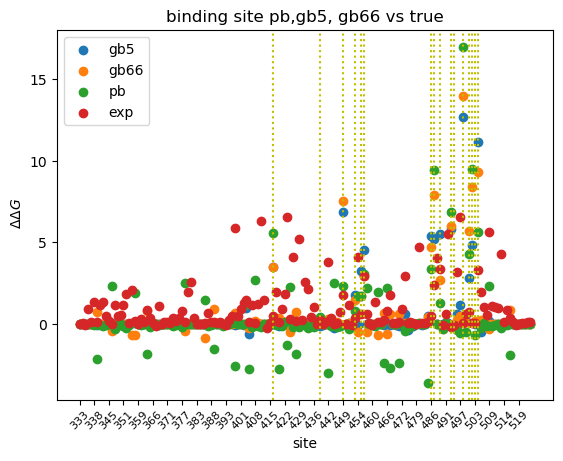

In [64]:
plt.scatter( df_num_data_sorted_mbondi["mutations"]
            ,-df_num_data_sorted_mbondi["delta_delta_g_gen"], label="gb5")
plt.scatter( df_num_data_sorted_mbondi["mutations"]
            ,-df_num_data_sorted_mbondi["delta_delta_g_gen_66"], label="gb66")
plt.scatter( df_num_data_sorted_mbondi["mutations"]
            ,-df_num_data_sorted_mbondi["delta_delta_g_pb"], label="pb")
plt.scatter( df_num_data_sorted_mbondi["mutations"]
            ,-df_num_data_sorted_mbondi["exp_data"], label="exp")
            
plt.legend()
plt.title("binding site pb,gb5, gb66 vs true")
plt.ylabel(" $\Delta \Delta G$")

tick_positions = np.arange(0, len(df_num_data_sorted_mbondi["mutations"]), 5)
tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos] for pos in tick_positions]

tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos][1:-1] for pos in tick_positions]
plt.xticks(tick_positions, tick_labels,rotation=45,  fontsize = 8)
plt.xlabel("site")

for idx in binding_site_idx:
    plt.axvline(x=idx, color='y', linestyle=':')



Text(0.5, 0, 'site')

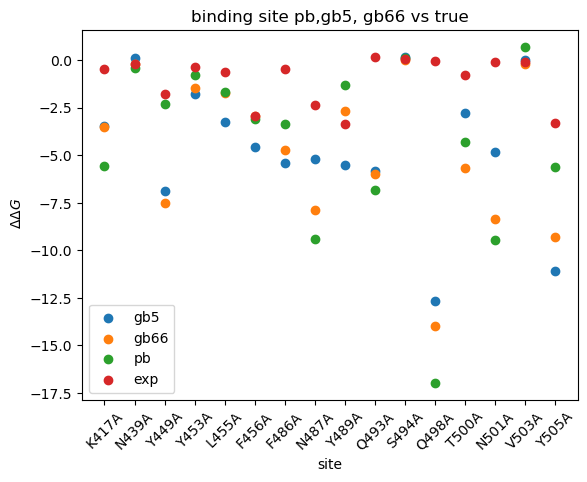

In [65]:
plt.scatter( df_num_data_sorted_binding_site_mbondi["mutations"]
            ,df_num_data_sorted_binding_site_mbondi["delta_delta_g_gen"], label="gb5")
plt.scatter( df_num_data_sorted_binding_site_mbondi["mutations"]
            ,df_num_data_sorted_binding_site_mbondi["delta_delta_g_gen_66"], label="gb66")
plt.scatter( df_num_data_sorted_binding_site_mbondi["mutations"]
            ,df_num_data_sorted_binding_site_mbondi["delta_delta_g_pb"], label="pb")
plt.scatter( df_num_data_sorted_binding_site_mbondi["mutations"]
            ,df_num_data_sorted_binding_site_mbondi["exp_data"], label="exp")
            
plt.legend()
plt.title("binding site pb,gb5, gb66 vs true")
plt.ylabel(" $\Delta \Delta G$")
plt.xticks(rotation=45)
plt.xlabel("site")

In [71]:


window_size = 3
moving_average = np.convolve(-df_num_data_sorted_mbondi["delta_delta_g_gen"], np.ones(window_size)/window_size, mode='valid')


In [73]:
len(df_num_data_sorted_mbondi["mutations"])

155

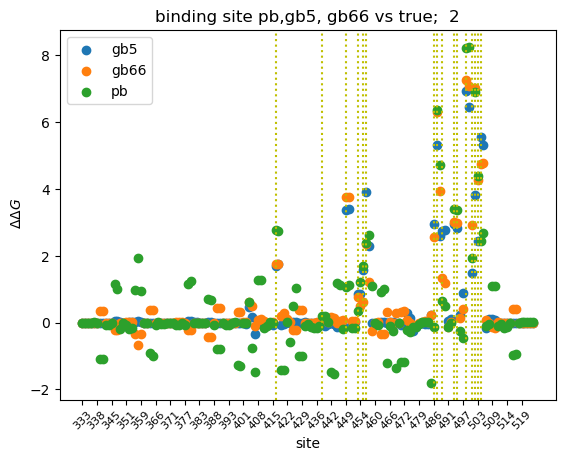

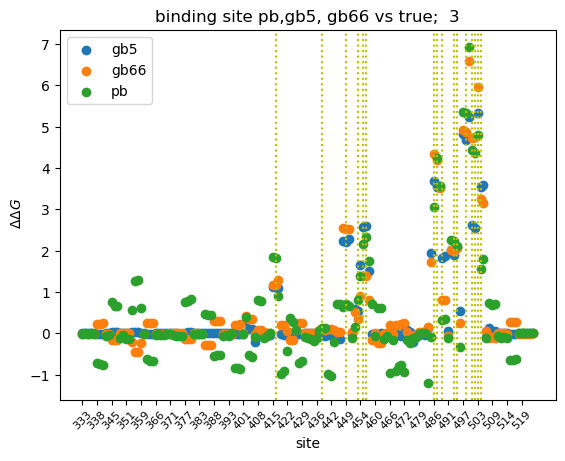

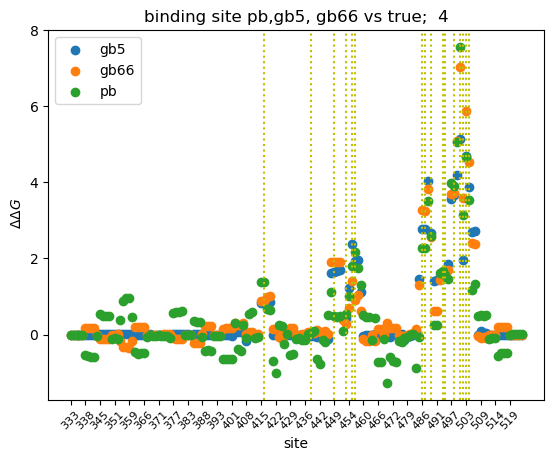

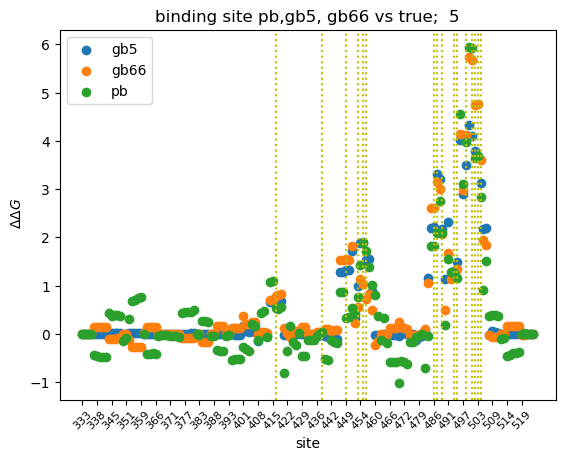

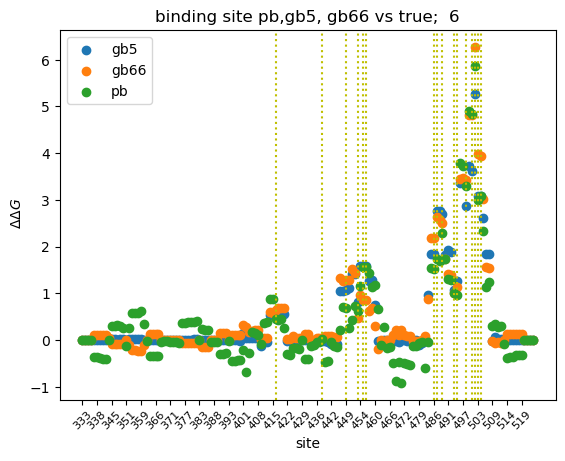

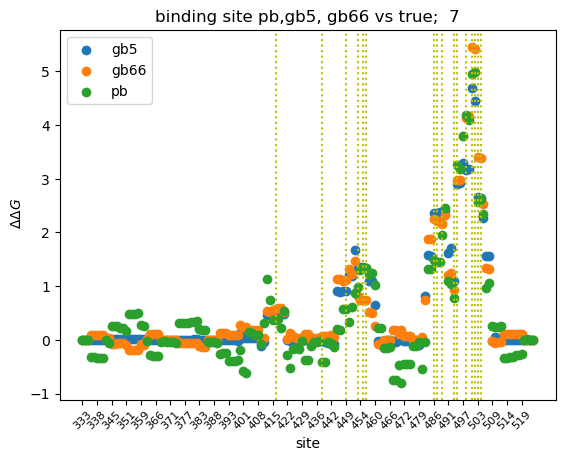

In [76]:
window_sizes = [2, 3, 4, 5, 6, 7]
for window_size in window_sizes : 
    
    moving_average_g_gen = np.convolve(-df_num_data_sorted_mbondi["delta_delta_g_gen"],\
        np.ones(window_size)/window_size, mode='same')
    #

    
    
    moving_average_g_gen_66 = np.convolve(-df_num_data_sorted_mbondi["delta_delta_g_gen_66"],\
        np.ones(window_size)/window_size, mode='same')
  
    
    moving_average_pb = np.convolve(-df_num_data_sorted_mbondi["delta_delta_g_pb"],\
        np.ones(window_size)/window_size, mode='same')
    
    
    plt.figure()
    plt.scatter( df_num_data_sorted_mbondi["mutations"]
                ,moving_average_g_gen, label="gb5")
    plt.scatter( df_num_data_sorted_mbondi["mutations"]
                ,moving_average_g_gen_66, label="gb66")
    plt.scatter( df_num_data_sorted_mbondi["mutations"]
                ,moving_average_pb, label="pb")
    # plt.scatter( df_num_data_sorted_mbondi["mutations"]
    #             ,-df_num_data_sorted_mbondi["exp_data"], label="exp")
                
    plt.legend()
    plt.title(f"binding site pb,gb5, gb66 vs true;  {window_size}")
    plt.ylabel(" $\Delta \Delta G$")

    tick_positions = np.arange(0, len(df_num_data_sorted_mbondi["mutations"]), 5)
    tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos] for pos in tick_positions]

    tick_labels = [df_num_data_sorted_mbondi["mutations"].iloc[pos][1:-1] for pos in tick_positions]
    plt.xticks(tick_positions, tick_labels,rotation=45,  fontsize = 8)
    plt.xlabel("site")

    for idx in binding_site_idx:
        plt.axvline(x=idx, color='y', linestyle=':')